## Multiple Linear Regression

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Loading Data


In [164]:
data = pd.read_csv("multiple_linear_regression.csv")

In [165]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Preprocessing

In [166]:
data = data.dropna()
data.shape

(200, 4)

### Splitting Data

In [167]:
output_col = "Target"

In [168]:
x= data.iloc[:, data.columns != output_col]

In [169]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [170]:
# output
y = data.loc[: , output_col]

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y, test_size=0.30, random_state = 43) 

In [172]:
data.shape

(200, 4)

In [173]:
x_train.shape


(140, 3)

In [174]:
x_test.shape

(60, 3)

In [175]:
y_test.shape

(60,)

In [176]:
y_train.shape

(140,)

### Multiple Linear Regression
### Training

In [177]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [178]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [179]:
lr.intercept_

3.0777744955280433

### Prediction

In [180]:
pred_value = lr.predict(x_test)
pred_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

### cost

In [181]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, pred_value)
cost

2.2412862530933473

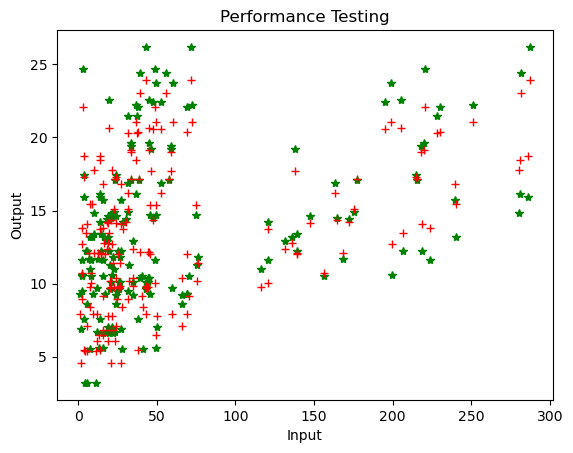

In [182]:
plt.plot(x_test, y_test , "*", color = "green")
plt.plot(x_test, pred_value , "+", color = "red")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


## ASSUMPTIONS OF LINEAR REGRESSION

### Homoscedasticity

In [183]:
pred_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [184]:
residuals = y_test - pred_value

In [185]:
print(y_test)

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
181    12.2
171    14.5
12      9.2
55     23.7
77     14.2
22      5.6
129     9.7
105    19.2
102    14.8
159    12.9
9      10.6
15     22.4
150    16.1
76      6.9
119     6.6
Name: Target, dtype: float64


In [186]:
residuals

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
Name: Target, dtype: float64

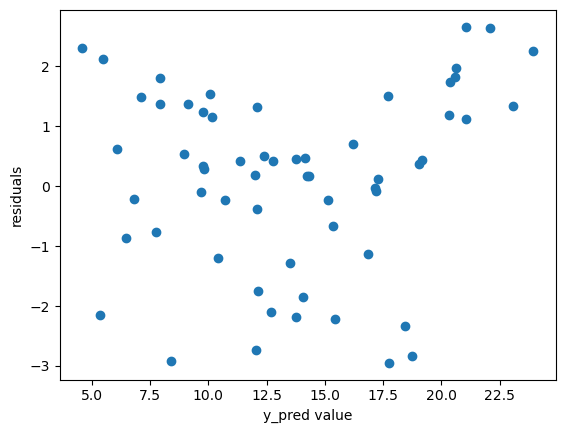

In [187]:
plt.scatter(pred_value, residuals)
plt.xlabel("y_pred value")
plt.ylabel("residuals")
plt.show()

### Normality of the residuals

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


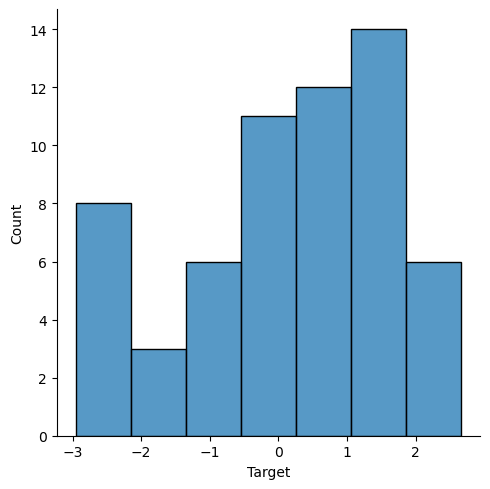

In [188]:
sns.displot(residuals)

### Ordinary Least Square (OLS) Method

In [189]:
import statsmodels.api as sm 

In [190]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [191]:
x_with_constant = sm.add_constant(x_train)


In [192]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [193]:
model = sm.OLS(y_train,x_with_constant)

In [194]:
result = model.fit()
result

In [195]:
result.params


const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [196]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [197]:
lr.intercept_

3.0777744955280433

In [198]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.67e-63
Time:                        22:50:34   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [199]:
x_test = sm.add_constant(x_test)

In [200]:
y_pred = result.predict(x_test)

In [201]:
residual = y_test - y_pred

In [202]:
residual

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
dtype: float64

In [203]:
np.mean(residual)

0.11398299824531002